In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from pywaffle import Waffle
plt.rcParams['svg.fonttype'] = 'none'

/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Chart 1 - Revolver and pistol exports from US to Brazil

In [3]:
# open the data
#source: https://comtrade.un.org/data/
# how: USA exports to Brazil for HS code 9302 - revolvers and pistols 

pd.set_option('display.max_columns', None)
df = pd.read_csv('rev_pist_export_usa_brazil.csv', usecols=['Year', 'Qty', 'Trade Value (US$)'])

# sort by year

df = df.sort_values('Year')

df

,Year,Qty,Trade Value (US$)
24,1991,500,50001
25,1992,2202,297555
26,1993,500,113548
27,1994,249,68154
28,1995,2205,280837
20,1996,2221,356428
21,1997,79,21059
22,1998,53,17908
23,1999,77,16408
15,2002,377,63181


/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 3 in image.
/Users/luizfernandotoledo/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: weapons_year.svg


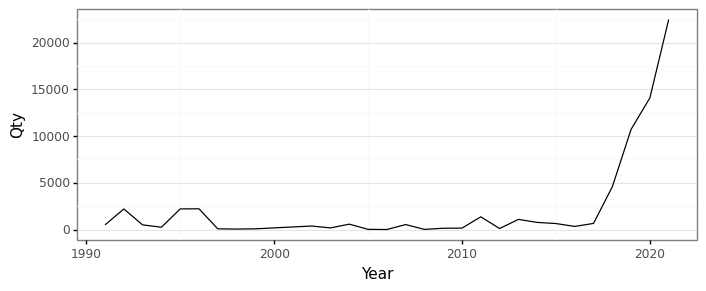

<ggplot: (377899737)>

In [4]:
weapons_year = (
    ggplot(df)
    + aes(x='Year', y='Qty')
    + geom_line()
    + theme_bw()
    + theme(figure_size=(8, 3))
    + theme(panel_grid_major_x=element_blank())
   
    
 )

weapons_year.save("weapons_year.svg")
weapons_year


# Chart 2 - Revolver and pistol seized by DPF (Federal Police) in Brazil by country

In [6]:
# join different sheets from the same xlsx
dpf_weapons2013 = pd.read_excel('armas_apreendidas_pf.xlsx')
dpf_weapons2014 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2014')
dpf_weapons2015 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2015')
dpf_weapons2016 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2016')
dpf_weapons2017 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2017')
dpf_weapons2018 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2018')
dpf_weapons2019 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2019')
dpf_weapons2020 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2020')
dpf_weapons2021 = pd.read_excel('armas_apreendidas_pf.xlsx', sheet_name='2021')
dpf = pd.concat([dpf_weapons2013, dpf_weapons2014, dpf_weapons2015, dpf_weapons2016, dpf_weapons2017, dpf_weapons2018, dpf_weapons2019, dpf_weapons2020, dpf_weapons2021])
dpf

,Fabricante,Espécie,Calibre,Qtde Apreensão,Data apreensão,Mês,UF Apreensão,Unidade Apreensão,Origem,Ano
0,Hk (Heckler & Koch),Metralhadora,9mm,1,2013-01-10,jan,PR,DPF/FIG/PR,Alemanha,2013
1,Sauer,Espingarda,12,1,2013-02-14,fev,DF,SR/PF/DF,Alemanha,2013
2,Hk (Heckler & Koch)Wilson,Fuzil,Não identificado,1,2013-02-28,fev,RJ,SR/PF/RJ,Alemanha,2013
3,Walther,Pistola,765,1,2013-03-27,mar,SP,DPF/JLS/SP,Alemanha,2013
4,Walther,Pistola,9mm,1,2013-03-27,mar,SP,DPF/JLS/SP,Alemanha,2013
...,...,...,...,...,...,...,...,...,...,...
369,Não identificado,Pistola,9mm,1,2021-11-07,nov,RS,SR/PF/RS,Turquia,2021
370,Canik,Pistola,9mm,1,2021-11-10,nov,RJ,DPF/NIG/RJ,Turquia,2021
371,Canik,Pistola,9mm,2,2021-11-20,nov,PR,DPF/FIG/PR,Turquia,2021
372,Canik,Pistola,Não identificado,2,2021-11-20,nov,PR,DPF/FIG/PR,Turquia,2021


In [7]:
# remove the spaaces in the column names
dpf.columns = dpf.columns.str.replace(' ', '')
dpf


,Fabricante,Espécie,Calibre,QtdeApreensão,Dataapreensão,Mês,UFApreensão,UnidadeApreensão,Origem,Ano
0,Hk (Heckler & Koch),Metralhadora,9mm,1,2013-01-10,jan,PR,DPF/FIG/PR,Alemanha,2013
1,Sauer,Espingarda,12,1,2013-02-14,fev,DF,SR/PF/DF,Alemanha,2013
2,Hk (Heckler & Koch)Wilson,Fuzil,Não identificado,1,2013-02-28,fev,RJ,SR/PF/RJ,Alemanha,2013
3,Walther,Pistola,765,1,2013-03-27,mar,SP,DPF/JLS/SP,Alemanha,2013
4,Walther,Pistola,9mm,1,2013-03-27,mar,SP,DPF/JLS/SP,Alemanha,2013
...,...,...,...,...,...,...,...,...,...,...
369,Não identificado,Pistola,9mm,1,2021-11-07,nov,RS,SR/PF/RS,Turquia,2021
370,Canik,Pistola,9mm,1,2021-11-10,nov,RJ,DPF/NIG/RJ,Turquia,2021
371,Canik,Pistola,9mm,2,2021-11-20,nov,PR,DPF/FIG/PR,Turquia,2021
372,Canik,Pistola,Não identificado,2,2021-11-20,nov,PR,DPF/FIG/PR,Turquia,2021


In [8]:
# most common types

dpf_common_weaponsdpf.groupby('Espécie').QtdeApreensão.sum().sort_values(ascending=False)

NameError: name 'dpf_common_weaponsdpf' is not defined

In [20]:
# most common brands

brands = dpf.groupby('Fabricante').QtdeApreensão.sum().sort_values(ascending=False).head(10).reset_index()
brands.to_csv('brands.csv', index=False)
brands

,Fabricante,QtdeApreensão
0,Glock,1190
1,Bersa,329
2,Smith & Wesson,279
3,Canik,227
4,Colt,204
5,Beretta,185
6,Cz,180
7,Girsan,102
8,Ruger,98
9,Winchester,83


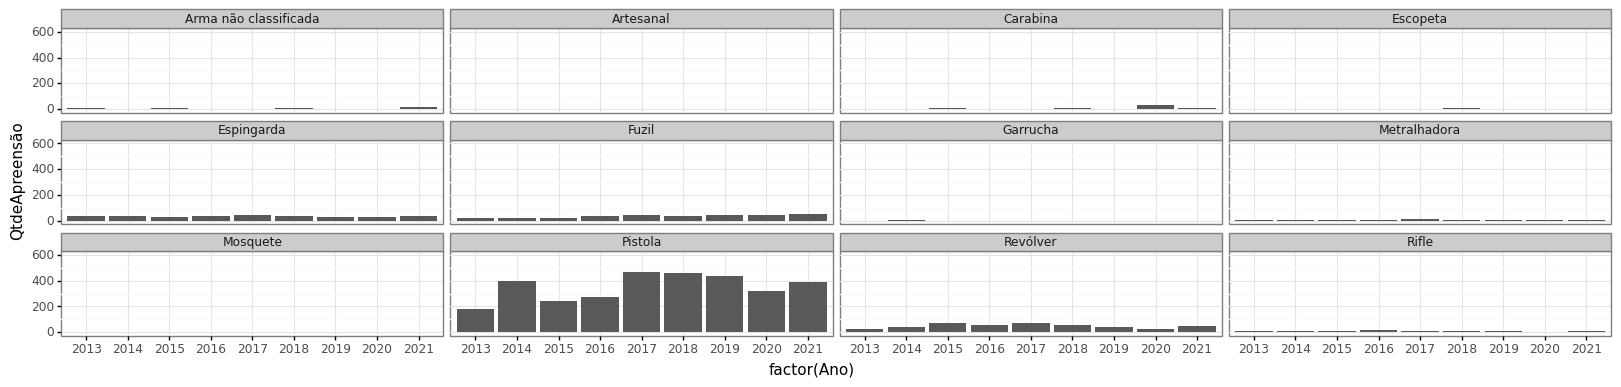

<ggplot: (377905445)>

In [10]:
#Seizure per year, per type of weapon

(
    ggplot(dpf,          
        aes('factor(Ano)', 'QtdeApreensão')) 
        + geom_bar(stat='summary', fun_y=sum)      
        + facet_wrap('Espécie')
        + theme_bw()
        + ylim(0, 600)
        + theme(figure_size=(20, 4))
)

In [11]:
weapon_types = dpf.groupby('Espécie').QtdeApreensão.sum().sort_values(ascending=False).reset_index()
weapon_types.to_csv('weapon_type.csv', index=False)
weapon_types

,Espécie,QtdeApreensão
0,Pistola,3167
1,Revólver,438
2,Fuzil,306
3,Espingarda,301
4,Rifle,79
5,Carabina,52
6,Metralhadora,43
7,Arma não classificada,41
8,Escopeta,19
9,Artesanal,4


In [12]:
weapon_types['%'] = weapon_types.QtdeApreensão / weapon_types.QtdeApreensão.sum()
weapon_types

,Espécie,QtdeApreensão,%
0,Pistola,3167,0.710887
1,Revólver,438,0.098316
2,Fuzil,306,0.068687
3,Espingarda,301,0.067565
4,Rifle,79,0.017733
5,Carabina,52,0.011672
6,Metralhadora,43,0.009652
7,Arma não classificada,41,0.009203
8,Escopeta,19,0.004265
9,Artesanal,4,0.000898


In [13]:
# reduce the amount of rows
aj = {'Type': ['Pistol', 'Revolver', 'Rifle', 'Shotgun', 'Other'], 'Amount': [3167, 438, 306, 301, 243]}
summarized_weapons = pd.DataFrame(data=aj)
summarized_weapons
summarized_weapons['percentage'] = round(summarized_weapons.Amount / round(summarized_weapons.Amount.sum(), 10))
summarized_weapons


,Type,Amount,percentage
0,Pistol,3167,1.0
1,Revolver,438,0.0
2,Rifle,306,0.0
3,Shotgun,301,0.0
4,Other,243,0.0


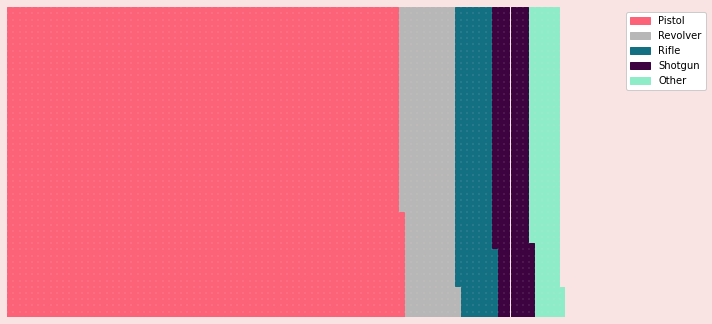

In [14]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=50,
    values=summarized_weapons.Amount,
    labels=list(summarized_weapons.Type),
    figsize=(10, 10),
    colors=("#fd6378", "#b7b7b7", "#137083", "#3d0240", '#8fecc8'),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'framealpha': 1}
)

fig.gca().set_facecolor('#fae3e3')
fig.set_facecolor('#fae3e3')

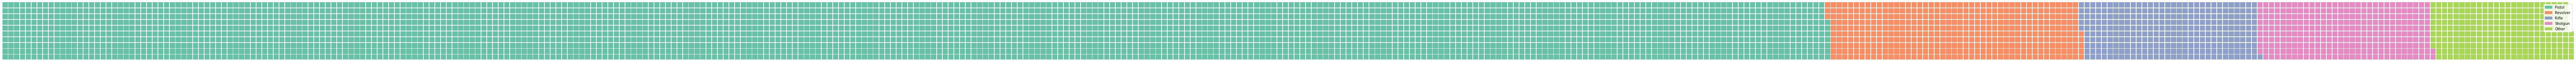

In [15]:



plt.rcParams["figure.figsize"] = [100.0, 100.0]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(
   FigureClass=Waffle,
   rows=10,
   values=summarized_weapons.Amount,
   labels=list(summarized_weapons.Type)
)
plt.show()

In [16]:
# Seize by country
seize_per_country = dpf.groupby('Origem').QtdeApreensão.sum().sort_values(ascending=False)

seize_per_country = seize_per_country.reset_index()

seize_per_country.to_csv('seize_per_country.csv', index=False)

seize_per_country.Origem

0        Estados Unidos
1               Áustria
2               Turquia
3             Argentina
4       Repúlica Tcheca
5                Itália
6              Alemanha
7                Israel
8               Croácia
9               Bélgica
10               Rússia
11              Espanha
12               México
13     República Tcheca
14               Sérvia
15                China
16            Artesanal
17            Filipinas
18              Romênia
19              Hungria
20           Montenegro
21    Reppublica Tcheca
22              Bolívia
Name: Origem, dtype: object

In [17]:
countries = dpf.Origem.reset_index()
countries.to_csv('countries.csv', index=False)